In [28]:
import pandas as pd
df = pd.read_csv("/Users/mac/Desktop/amore/STUDY-DATA/first_week/data_csv/GRDP시도별.csv")

In [29]:
df.columns = ["region", "grdp", "gross_income", "personal_income", "private_consumption"]
df.head()

,region,grdp,gross_income,personal_income,private_consumption
0,시도별,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비
1,전국,46491,47306,25536,23202
2,서울특별시,58255,65994,29372,27767
3,부산광역시,34762,35373,24026,23042
4,대구광역시,30985,34344,23760,22307


In [30]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
fontprop = fm.FontProperties(fname=font_path)

plt.rcParams["font.family"] = fontprop.get_name()
plt.rcParams["axes.unicode_minus"] = False

#### GRDP TOP 10 시각화 
#### 소득 대비 생산성 분석 

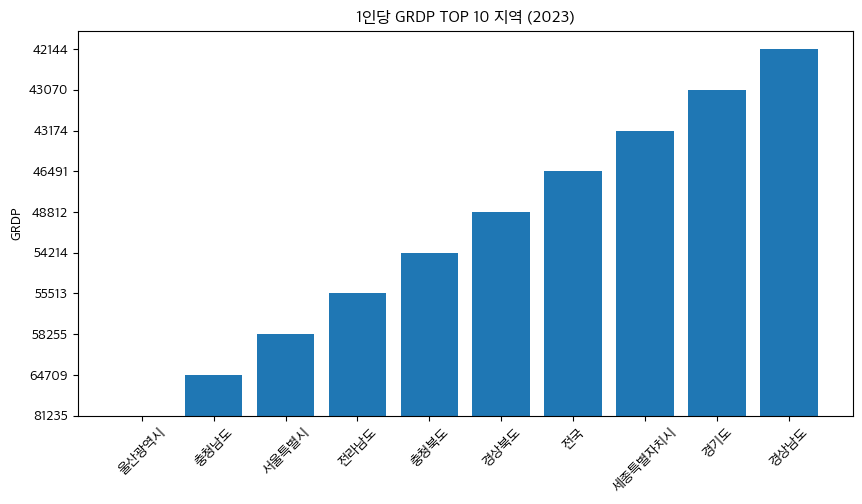

In [31]:
import matplotlib.pyplot as plt
top10 = df.sort_values("grdp", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10["region"], top10["grdp"])
plt.xticks(rotation=45)
plt.title("1인당 GRDP TOP 10 지역 (2023)")
plt.ylabel("GRDP")
plt.show()

#### 소득대비 소비 패턴 분석 

In [35]:
df["private_consumption"] = pd.to_numeric(df["private_consumption"], errors="coerce")
df["personal_income"] = pd.to_numeric(df["personal_income"], errors="coerce")

df["consumption_ratio"] = df["private_consumption"] / df["personal_income"]
df.sort_values("consumption_ratio", ascending=False).head(10)

,region,grdp,gross_income,personal_income,private_consumption,consumption_ratio
18,제주특별자치도,38450,36307,22893.0,23595.0,1.030664
3,부산광역시,34762,35373,24026.0,23042.0,0.959044
17,경상남도,42144,38879,22769.0,21756.0,0.955510
2,서울특별시,58255,65994,29372.0,27767.0,0.945356
4,대구광역시,30985,34344,23760.0,22307.0,0.938847
16,경상북도,48812,41091,22921.0,21078.0,0.919593
11,강원특별자치도,40713,37509,23326.0,21277.0,0.912158
6,광주광역시,35452,38019,25378.0,23096.0,0.910080
1,전국,46491,47306,25536.0,23202.0,0.908600
9,세종특별자치시,43174,47220,25995.0,23499.0,0.903982


#### 소비성향 상위 top 10 시각화 

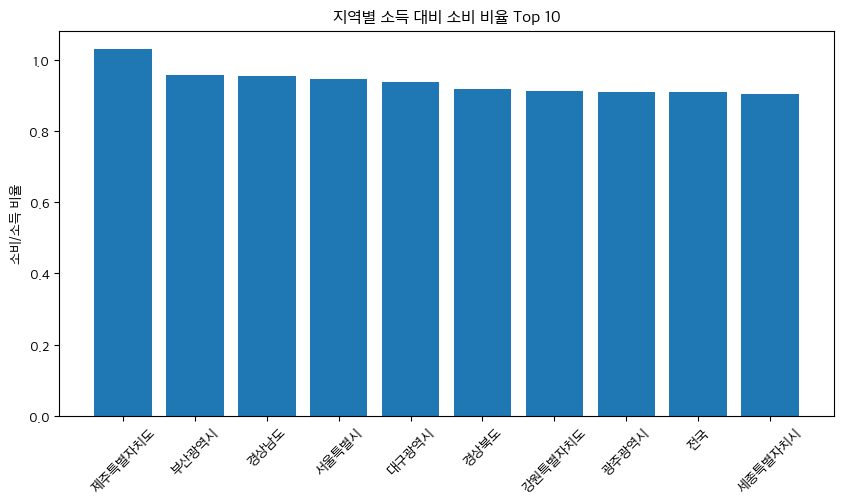

In [36]:
plt.figure(figsize=(10,5))
ratio_top10 = df.sort_values("consumption_ratio", ascending=False).head(10)
plt.bar(ratio_top10["region"], ratio_top10["consumption_ratio"])
plt.xticks(rotation=45)
plt.title("지역별 소득 대비 소비 비율 Top 10")
plt.ylabel("소비/소득 비율")
plt.show()

#### 소비 성향 클러스터링 (고소득/자소득 대비 소비 패턴 분석)

In [37]:
df["cluster"] = pd.cut(df["consumption_ratio"], bins=[0, 0.7, 1.0, 1.3, 10], labels=["보수적 소비", "평균 소비", "적극적 소비", "초고소비"])
df[["region", "consumption_ratio", "cluster"]]

,region,consumption_ratio,cluster
0,시도별,NaN,NaN
1,전국,0.908600,평균 소비
2,서울특별시,0.945356,평균 소비
3,부산광역시,0.959044,평균 소비
4,대구광역시,0.938847,평균 소비
5,인천광역시,0.878208,평균 소비
6,광주광역시,0.910080,평균 소비
7,대전광역시,0.881554,평균 소비
8,울산광역시,0.830724,평균 소비
9,세종특별자치시,0.903982,평균 소비


#### “2034 여성 + 소비 성향 + GRDP”
#### → 세 개 지표를 합쳐서 Beauty Market Potential Score 만들면
#### Potential = (여성 인구 비중 × 0.5) + (소비 성향 × 0.3) + (GRDP × 0.2)